In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income_clustering.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


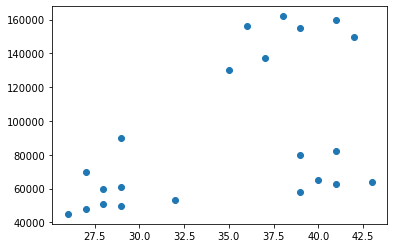

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3)

In [6]:
km

KMeans(n_clusters=3)

In [7]:
y_predict = km.fit_predict(df[['Age','Income($)']])    # this created 3 cluster 0,1 & 2
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


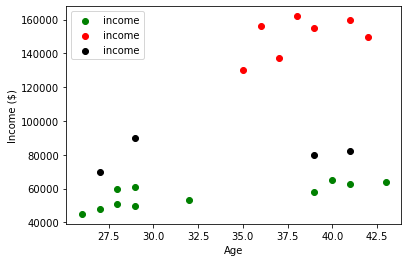

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='income')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='income')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler() 

In [19]:
scaler.fit(df[['Income($)']])                  # need to scale our features so that we won't get the clustering issue   
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])          # with this we changed our features values less than 1 

In [20]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [21]:
km = KMeans(n_clusters=3)

In [26]:
y_predict2 = km.fit_predict(df[['Age','Income($)']])

In [27]:
y_predict2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
df['scaled_cluster'] = y_predict2

In [29]:
df

,Name,Age,Income($),cluster,scaled_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


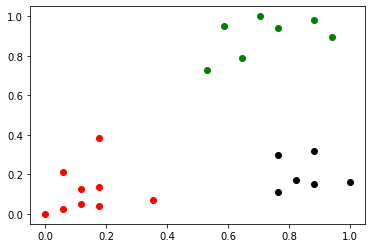

In [31]:
df1 = df[df.scaled_cluster ==0]
df2 = df[df.scaled_cluster ==1]
df3 = df[df.scaled_cluster ==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')


In [32]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

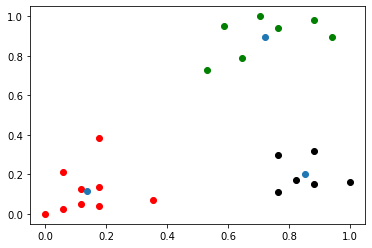

In [33]:
df1 = df[df.scaled_cluster ==0]
df2 = df[df.scaled_cluster ==1]
df3 = df[df.scaled_cluster ==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [36]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979426]

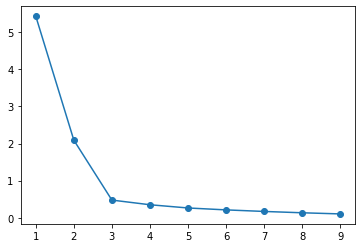

In [40]:
plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)    # as elbow is at 3 therefore sse=3

# excersice 2

In [93]:
from sklearn.datasets import load_iris

In [94]:
iris = load_iris()

In [95]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [96]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [97]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [98]:
iris_df.drop(['sepal length (cm)','sepal width (cm)'], axis=1, inplace=True)

In [99]:
iris_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


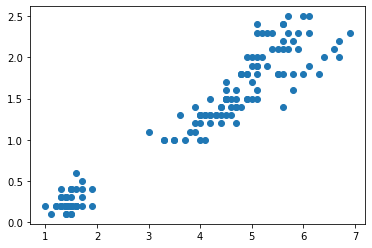

In [100]:
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'])

In [101]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [102]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.477123363965468,
 13.91690875790876,
 11.057257664362925,
 9.242108730158728,
 7.615402244955954,
 6.4802592066927085]

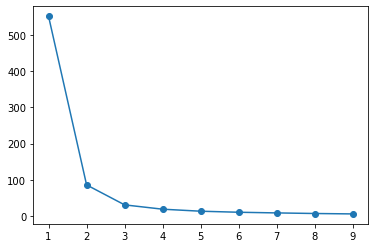

In [103]:
plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)

In [104]:
from sklearn.cluster import KMeans

In [105]:
km = KMeans(n_clusters=3)

In [106]:
predicted = km.fit_predict(iris_df)

In [107]:
iris_df['cluster'] = predicted

In [108]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
iris_df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


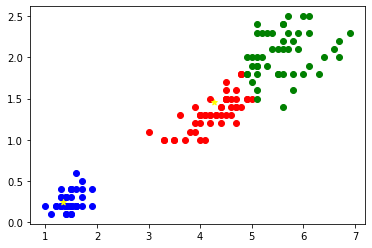

In [114]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df['cluster']==1]
df3 = iris_df[iris_df['cluster']==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'green')
plt.scatter(km.cluster_centers_[0],km.cluster_centers_[1],marker='*',color = 'yellow')

In [111]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [ ]:
plt.plot()